![Demosaicking](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/0129bbd70539e5c601b76b03e4d3883f67c39e72/Sesiones/Sesion2/Images/poster_sesion2.png)

# 🎨 **Hands-on Sesión 2.2: Image Processing Pipeline** 🖼️

En esta sesión aprenderemos a aplicar distintas transformaciones en imágenes RAW como parte de un **pipeline de procesamiento de imágenes**. 🚀

Exploraremos:  
✅ Carga y visualización de imágenes RAW 📷  
✅ Corrección de ruido 🧹  
✅ Ajuste de brillo y color 🌈  
✅ Corrección gamma ⚡  
✅ Cambio de espacio de color 🎭  
✅ Demosaicking avanzado con el método AHD 🏞️  


## 📂 **1. Cargar librerías** <a name="tema1"></a>

Vamos a instalar y cargar las librerías necesarias para procesar imágenes RAW.

In [5]:
%%capture
!pip install -q rawpy
import numpy as np
import matplotlib.pyplot as plt
import rawpy

## 📥 **2. Cargar una imagen RAW** <a name="tema2"></a>

Descarguemos y carguemos una imagen de ejemplo en formato `.dng` para trabajar en esta sesión.

In [ ]:
# @title Descargar imagen
%%capture
image_dir = "raw_GOPRO1.dng"
!wget https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng

### 🔍 **Metadatos de la imagen RAW**

Para entender mejor la imagen, vamos a inspeccionar sus metadatos usando `exiftool`.

In [ ]:
!apt-get install exiftool -y -qq
!exiftool raw_GOPRO1.dng

zsh:1: command not found: exiftool


### 🖼️ **Visualización de la imagen RAW**

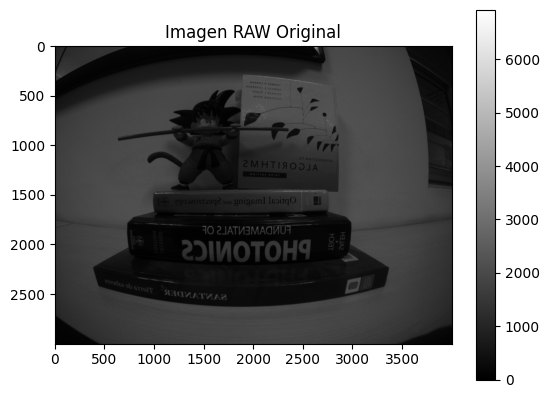

In [17]:
with rawpy.imread(image_dir) as raw:
    image0 = raw.raw_image_visible.copy()
plt.imshow(image0, cmap='gray')
plt.colorbar()
plt.title("Imagen RAW Original")
plt.show()

## 🧹 **3. Corrección de ruido previa a la convolución** <a name="tema3"></a>

Aplicamos reducción de ruido utilizando **Filtro de Detección de Bordes Bilateral** (FBDD).

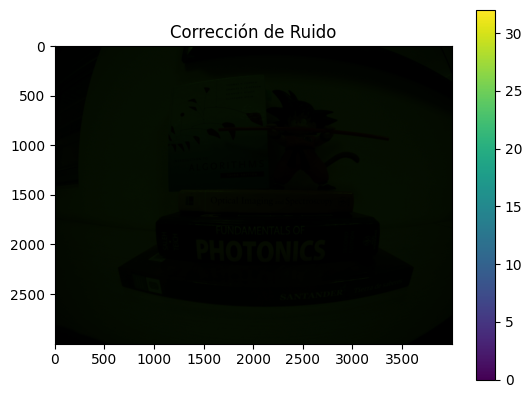

In [14]:
with rawpy.imread(image_dir) as raw:
    image1 = raw.postprocess(
        fbdd_noise_reduction=rawpy.FBDDNoiseReductionMode(1),
        demosaic_algorithm=rawpy.DemosaicAlgorithm(0),
        output_color=rawpy.ColorSpace(1),
        no_auto_scale=True,
        no_auto_bright=True,
        gamma=(1,1)
    )
plt.imshow(image1)
plt.colorbar()
plt.title("Corrección de Ruido")
plt.show()

## 🎨 **4. Corrección de Color** <a name="tema4"></a>

Eliminamos `no_auto_scale` para permitir la corrección automática de color.

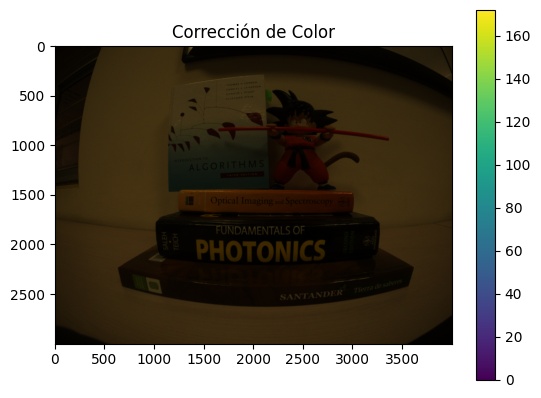

In [8]:
with rawpy.imread(image_dir) as raw:
    image2 = raw.postprocess(
        fbdd_noise_reduction=rawpy.FBDDNoiseReductionMode(1),
        demosaic_algorithm=rawpy.DemosaicAlgorithm(0),
        output_color=rawpy.ColorSpace(1),
        no_auto_scale=False,
        no_auto_bright=True,
        gamma=(1,1)
    )
plt.imshow(image2)
plt.colorbar()
plt.title("Corrección de Color")
plt.show()

## 🔆 **5. Ajuste de Brillo** <a name="tema5"></a>

Eliminamos `no_auto_bright` para permitir ajuste automático del brillo.

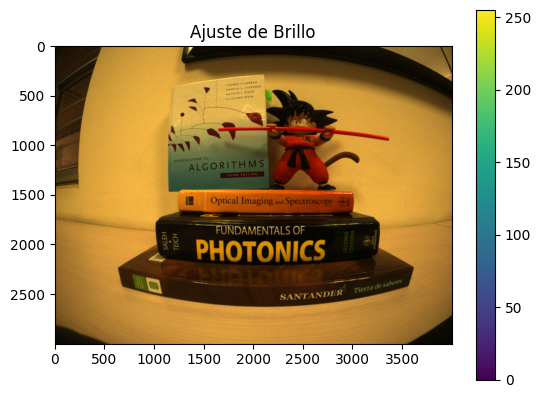

In [9]:
with rawpy.imread(image_dir) as raw:
    image3 = raw.postprocess(
        fbdd_noise_reduction=rawpy.FBDDNoiseReductionMode(1),
        demosaic_algorithm=rawpy.DemosaicAlgorithm(0),
        output_color=rawpy.ColorSpace(1),
        no_auto_scale=False,
        no_auto_bright=False,
        gamma=(1,1)
    )
plt.imshow(image3)
plt.colorbar()
plt.title("Ajuste de Brillo")
plt.show()

## ⚡ **6. Corrección Gamma** <a name="tema6"></a>

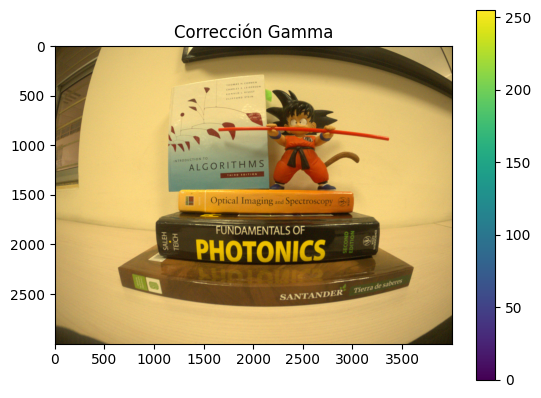

In [10]:
with rawpy.imread(image_dir) as raw:
    image4 = raw.postprocess(
        fbdd_noise_reduction=rawpy.FBDDNoiseReductionMode(1),
        demosaic_algorithm=rawpy.DemosaicAlgorithm(0),
        output_color=rawpy.ColorSpace(1),
        no_auto_scale=False,
        no_auto_bright=False,
        gamma=(2.222, 4.5)
    )
plt.imshow(image4)
plt.colorbar()
plt.title("Corrección Gamma")
plt.show()

## 🌍 **7. Cambio de Espacio de Color a P3D65** <a name="tema7"></a>

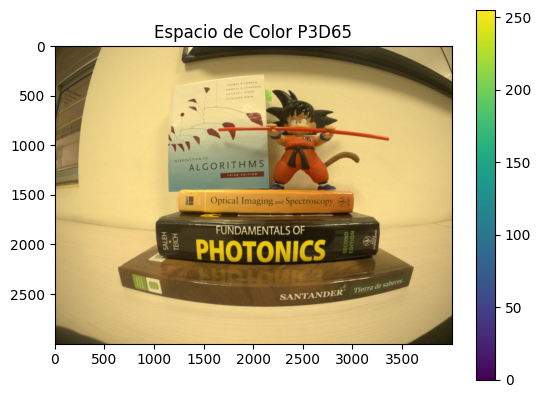

In [11]:
with rawpy.imread(image_dir) as raw:
    image5 = raw.postprocess(
        fbdd_noise_reduction=rawpy.FBDDNoiseReductionMode(1),
        demosaic_algorithm=rawpy.DemosaicAlgorithm(0),
        output_color=rawpy.ColorSpace(7),
        no_auto_scale=False,
        no_auto_bright=False,
        gamma=(2.222, 4.5)
    )
plt.imshow(image5)
plt.colorbar()
plt.title("Espacio de Color P3D65")
plt.show()

## 🏞️ **8. Demosaicking con AHD** <a name="tema8"></a>

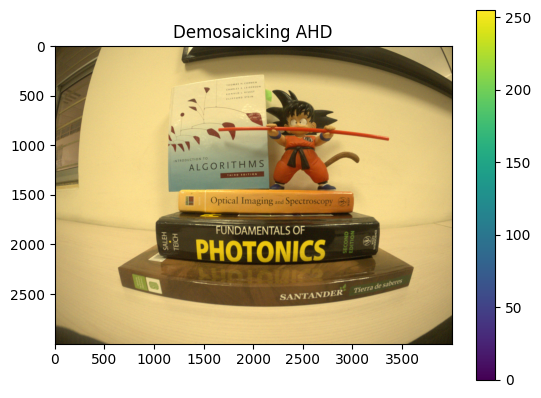

In [12]:
with rawpy.imread(image_dir) as raw:
    image6 = raw.postprocess(
        fbdd_noise_reduction=rawpy.FBDDNoiseReductionMode(1),
        demosaic_algorithm=rawpy.DemosaicAlgorithm(3),
        output_color=rawpy.ColorSpace(7),
        no_auto_scale=False,
        no_auto_bright=False,
        gamma=(2.222, 4.5)
    )
plt.imshow(image6)
plt.colorbar()
plt.title("Demosaicking AHD")
plt.show()

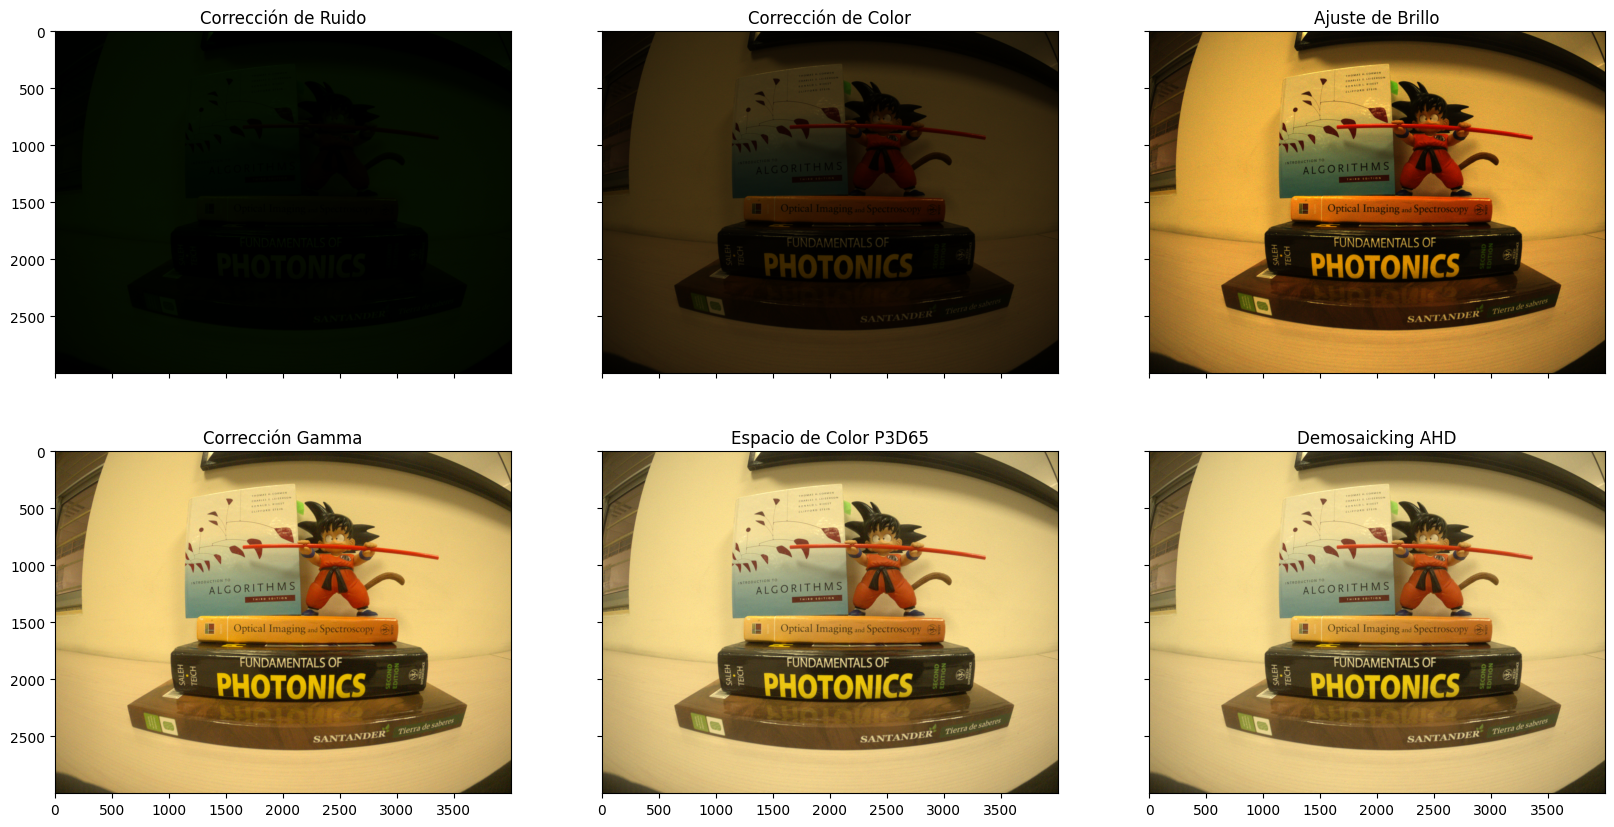

In [22]:
# overview all images
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].imshow(image1)
axs[0, 0].set_title("Corrección de Ruido")
axs[0, 1].imshow(image2)
axs[0, 1].set_title("Corrección de Color")
axs[0, 2].imshow(image3)
axs[0, 2].set_title("Ajuste de Brillo")
axs[1, 0].imshow(image4)
axs[1, 0].set_title("Corrección Gamma")
axs[1, 1].imshow(image5)
axs[1, 1].set_title("Espacio de Color P3D65")
axs[1, 2].imshow(image6)
axs[1, 2].set_title("Demosaicking AHD")
for ax in axs.flat:
    ax.label_outer()
plt.show()